# Demo

In [1]:
import retrodetect as rd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2 #note: cv2 needed for this demo

flash = cv2.imread('flash1.jpg',0).astype(float)
noflash = cv2.imread('noflash1.jpg',0).astype(float)

In [2]:
#done = rd.detect(flash,noflash)
#the above, commented out function does three things...
shift = rd.getshift(flash,noflash)
out_img = rd.getblockmaxedimage(noflash)
done = rd.alignandsubtract(out_img,shift,flash)
#here we time them
%timeit rd.getshift(flash,noflash) #205ms
%timeit rd.getblockmaxedimage(noflash) #90ms
%timeit rd.alignandsubtract(out_img,shift,flash) #230ms #TODO This function contains a slow precise interpolation. FIX!

184 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.6 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
234 ms ± 4.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


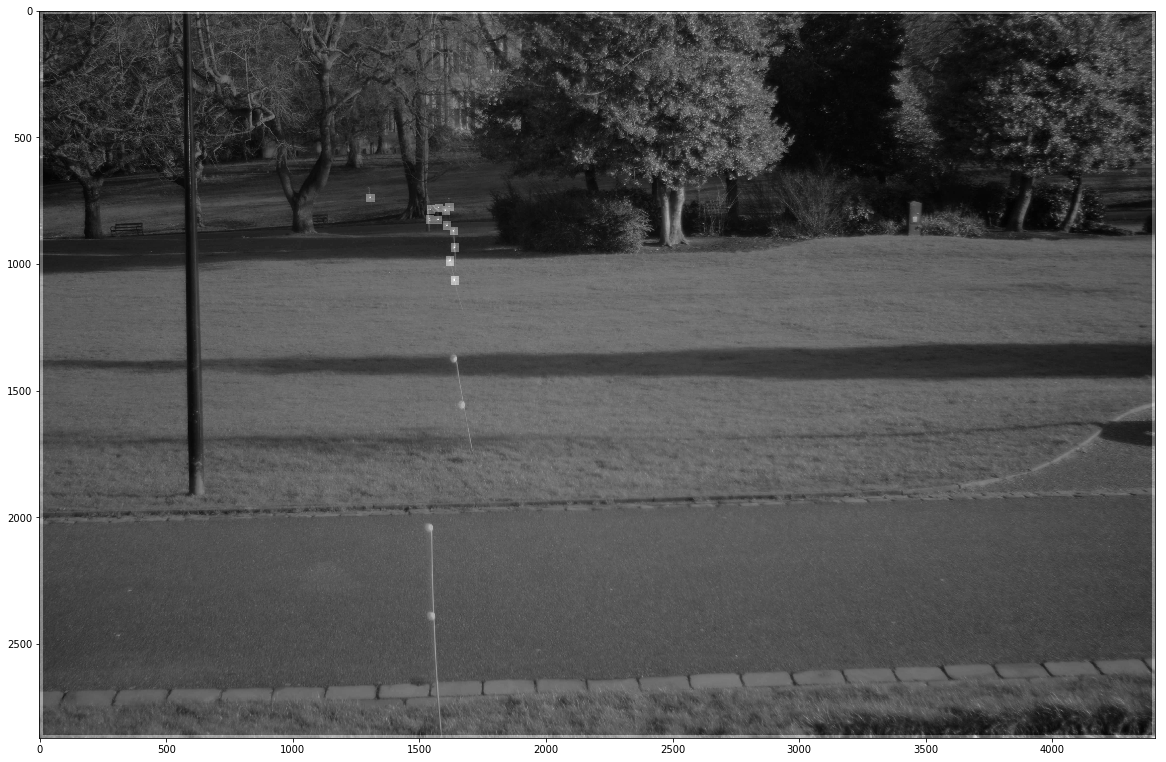

In [6]:
plt.figure(figsize=[20,20])
foundimg = 10*(rd.getblockmaxedimage(done,3,5)>40)
plt.imshow(flash[100:-100,100:-100]*0.1+foundimg,cmap='gray')
#the low res image version can't see the distant reflectors